In [ ]:
%cd /content/drive/MyDrive/AI_Internship/task3

/content/drive/MyDrive/AI_Internship/task3


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5/

/content/drive/MyDrive/AI_Internship/task3/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

**YAML config file for YOLOv5 training dataset**

In [ ]:
#YOLOv5 needs a configuration file to understand

yaml_text = """
train: /content/drive/MyDrive/AI_Internship/task3/animals_yolo/images/train
val: /content/drive/MyDrive/AI_Internship/task3/animals_yolo/images/val

nc: 2
names: ['cat', 'dog']
"""

with open("/content/drive/MyDrive/AI_Internship/task3/animals_yolo.yaml", "w") as f:
    f.write(yaml_text)


**YOLOv5 Training**

In [ ]:
# Train with 640x640 images
# Use batch size 8 How many images are processed at once
# Train for 20 epochs The number of complete passes through the training dataset
# Use custom dataset YAML
# Start training from YOLOv5s pretrained weights #Start training from a small pre-trained YOLOv5 model (s = small).
# Save under runs/train/animals_yolov5s
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 70 \
  --data /content/drive/MyDrive/AI_Internship/task3/animals_yolo.yaml \
  --weights yolov5s.pt \
  --name animals_yolov5s #Name the training run folder under runs/train/animals_yolov5s/. This helps keep results organized.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-30 14:13:17.298428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746022397.496052    2576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746022397.550572    2576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

**Running inference (object detection) using trained YOLOv5 model**

In [ ]:
#weight - #Path to your trained model
#Save detection results in .txt files (YOLO format)
#Save confidence scores along with predictions
!python detect.py \
  --weights /content/drive/MyDrive/AI_Internship/task3/yolov5/runs/train/animals_yolov5s10/weights/best.pt \
  --source /content/drive/MyDrive/AI_Internship/task3/animals_yolo/images/val \
  --img 640 \
  --save-txt \
  --save-conf \
  --project /content/drive/MyDrive/AI_Internship/task3/yolov5/runs/detect \
  --name exp \
  --exist-ok
#Don’t crash if the folder already exists; just reuse it

detect: weights=['/content/drive/MyDrive/AI_Internship/task3/yolov5/runs/train/animals_yolov5s10/weights/best.pt'], source=/content/drive/MyDrive/AI_Internship/task3/animals_yolo/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/AI_Internship/task3/yolov5/runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-414-g78daef4b Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/26 /content/drive/MyDrive/AI_Internship/task3/animals_yolo/images/val/00007-4122619880.png: 640x640 1 cat, 11.4ms
image 2/26 /content/drive/MyDrive/

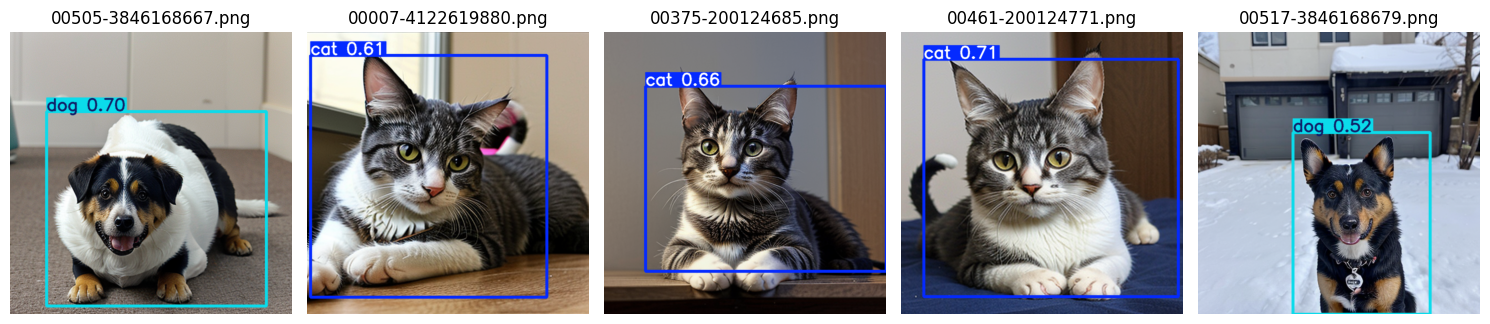

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2 #used for image processing (reading and converting images).

# Path to detection results
result_path = '/content/drive/MyDrive/AI_Internship/task3/yolov5/runs/detect/exp'

# Get list of image files
image_files = [f for f in os.listdir(result_path) if f.endswith(('.jpg', '.png'))]

# Randomly choose 4–5 images
num_images = min(5, len(image_files))
random_images = random.sample(image_files, num_images)

# Plot images
plt.figure(figsize=(15, 10))
for i, filename in enumerate(random_images):
    img_path = os.path.join(result_path, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib expects RGB.

    plt.subplot(1, num_images, i + 1) #subplot layout (1 row, num_images columns), and selects the (i + 1)-th subplot.
    plt.imshow(img)
    plt.axis('off')
    plt.title(filename)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def compute_iou(box1, box2):
    # box format: [x_center, y_center, width, height]
    x1_min = box1[0] - box1[2] / 2 # calculate corner points
    y1_min = box1[1] - box1[3] / 2
    x1_max = box1[0] + box1[2] / 2
    y1_max = box1[1] + box1[3] / 2

    x2_min = box2[0] - box2[2] / 2
    y2_min = box2[1] - box2[3] / 2
    x2_max = box2[0] + box2[2] / 2
    y2_max = box2[1] + box2[3] / 2

    inter_xmin = max(x1_min, x2_min)
    inter_ymin = max(y1_min, y2_min)
    inter_xmax = min(x1_max, x2_max)
    inter_ymax = min(y1_max, y2_max)

    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)

    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

def custom_metric(box1, box2, img_width, img_height, alpha=0.5, beta=0.3, gamma=0.2):
    iou = compute_iou(box1, box2)

    center_dist = np.sqrt((box1[0] - box2[0]) ** 2 + (box1[1] - box2[1]) ** 2) #Computes distance between box centers.
    diag = np.sqrt(img_width ** 2 + img_height ** 2)#Calculates the diagonal length of the image using Pythagoras theorem. normalize the center distance into a value between 0 and 1.
    normalized_center_dist = center_dist / diag

    ar1 = box1[2] / box1[3] #Aspect Ratio Similarity , similarity is higher when ratios are close
    ar2 = box2[2] / box2[3]
    ar_sim = 1 - abs(ar1 - ar2) / max(ar1, ar2)

    return alpha * iou + beta * (1 - normalized_center_dist) + gamma * ar_sim


**Custom Metric Evaluation**

In [ ]:
import os
import numpy as np
from tqdm import tqdm #A progress bar library that wraps around loops to show progress

def read_yolo_labels(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

def evaluate_custom_metric(pred_dir, gt_dir, img_width, img_height):
    total_score = 0
    count = 0

    for fname in tqdm(os.listdir(gt_dir)):
        if not fname.endswith('.txt'):
            continue

        gt_boxes = read_yolo_labels(os.path.join(gt_dir, fname))
        pred_file = os.path.join(pred_dir, fname)

        if not os.path.exists(pred_file):
            continue

        pred_boxes = read_yolo_labels(pred_file)

        for gt in gt_boxes:
            best_score = 0
            for pred in pred_boxes:
                if int(gt[0]) != int(pred[0]):
                    continue  # class mismatch
                score = custom_metric(gt[1:], pred[1:], img_width, img_height)
                best_score = max(best_score, score)
            total_score += best_score
            count += 1

    return total_score / count if count > 0 else 0

# Example usage
if __name__ == "__main__":
    pred_folder = "/content/drive/MyDrive/AI_Internship/task3/yolov5/runs/detect/exp/labels"
    gt_folder = "/content/drive/MyDrive/AI_Internship/task3/animals_yolo/labels/val"
    img_width = 640
    img_height = 640

    avg_score = evaluate_custom_metric(pred_folder, gt_folder, img_width, img_height)
    print(f"\n🔍 Average Custom Metric Score: {avg_score:.4f}")


100%|██████████| 27/27 [00:09<00:00,  2.78it/s]


🔍 Average Custom Metric Score: 0.8875
